In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Load the edge list and target data
edges_path = "musae_git_edges.csv"
target_path = "musae_git_target.csv"

edges_df = pd.read_csv(edges_path)
target_df = pd.read_csv(target_path)

# Display the first few rows of each dataset to understand the structure
edges_df.head(), target_df.head()


(   id_1   id_2
 0     0  23977
 1     1  34526
 2     1   2370
 3     1  14683
 4     1  29982,
    id          name  ml_target
 0   0        Eiryyy          0
 1   1    shawflying          0
 2   2   JpMCarrilho          1
 3   3     SuhwanCha          0
 4   4  sunilangadi2          1)

In [3]:
# Create a graph from the edge list
G = nx.Graph()
G.add_edges_from(edges_df.values)

# Compute Katz centrality and PageRank
katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000)
page_rank = nx.pagerank(G, alpha=0.85)

# Store results in a DataFrame
centrality_df = pd.DataFrame({
    "id": list(katz_centrality.keys()),
    "katz_centrality": list(katz_centrality.values()),
    "page_rank": list(page_rank.values())
})

# Merge with node metadata
merged_df = target_df.merge(centrality_df, on="id")

# Display the top nodes by Katz centrality and PageRank
top_katz = merged_df.sort_values(by="katz_centrality", ascending=False).head(10)
top_pagerank = merged_df.sort_values(by="page_rank", ascending=False).head(10)

top_katz, top_pagerank


(          id               name  ml_target  katz_centrality  page_rank
 31890  31890       dalinhuang99          0         0.286970   0.016514
 27803  27803             nfultz          0         0.234266   0.011451
 35773  35773         addyosmani          0         0.118404   0.004919
 19222  19222            Bunlong          0         0.109894   0.004669
 13638  13638  gabrielpconceicao          0         0.089868   0.003875
 36652  36652            rfthusn          0         0.077648   0.003799
 36628  36628     SuriyaaKudoIsc          0         0.063648   0.002276
 9051    9051             getify          0         0.063453   0.002722
 7027    7027            jeresig          0         0.062170   0.002051
 35008  35008                mdo          0         0.060235   0.002338,
           id               name  ml_target  katz_centrality  page_rank
 31890  31890       dalinhuang99          0         0.286970   0.016514
 27803  27803             nfultz          0         0.234266   

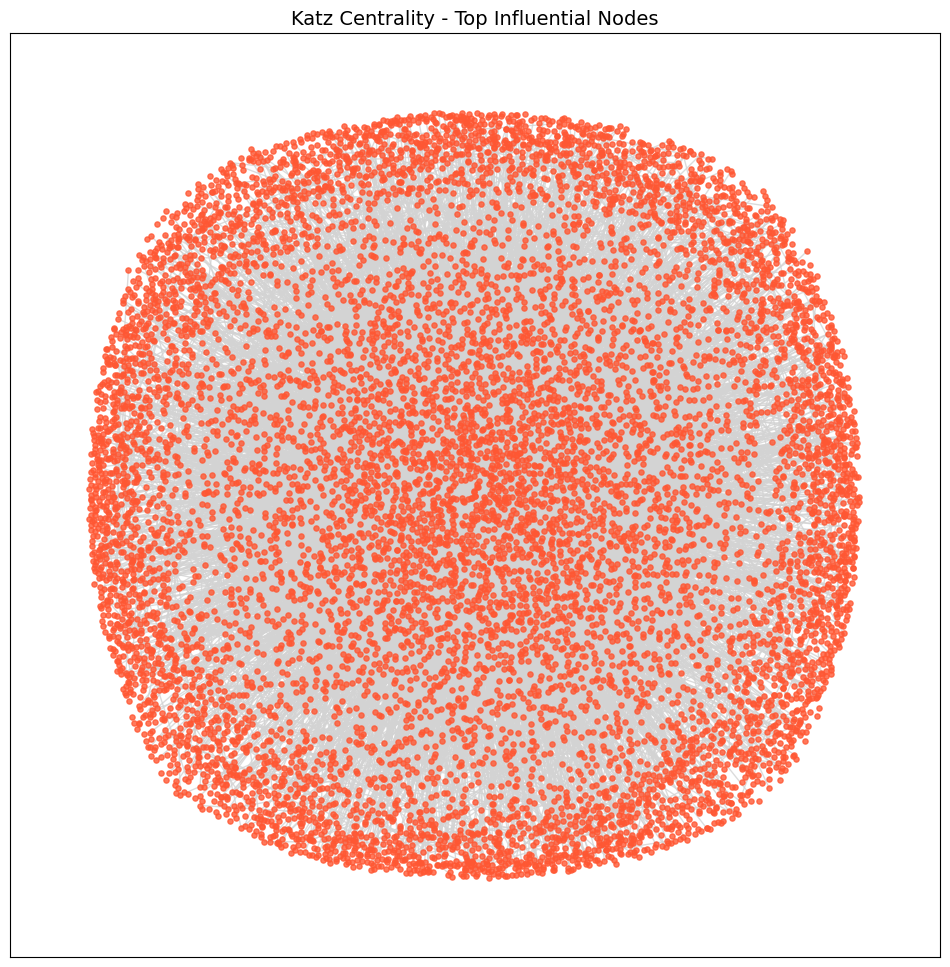

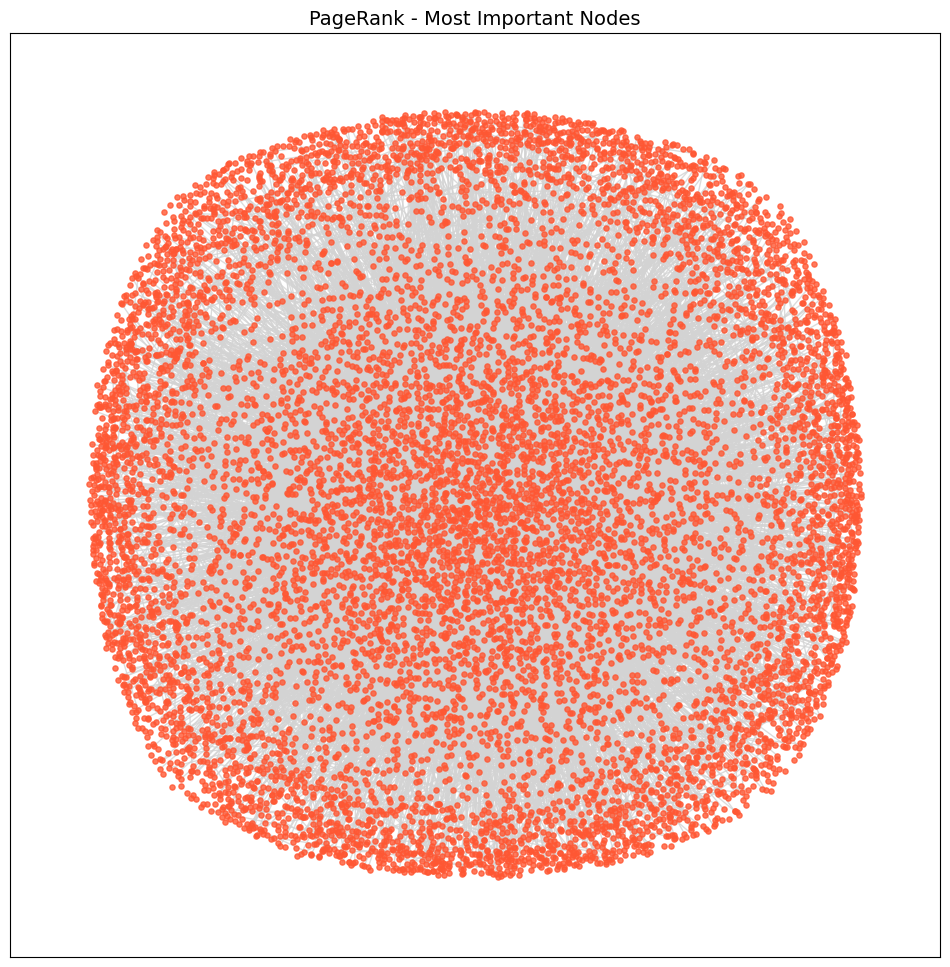

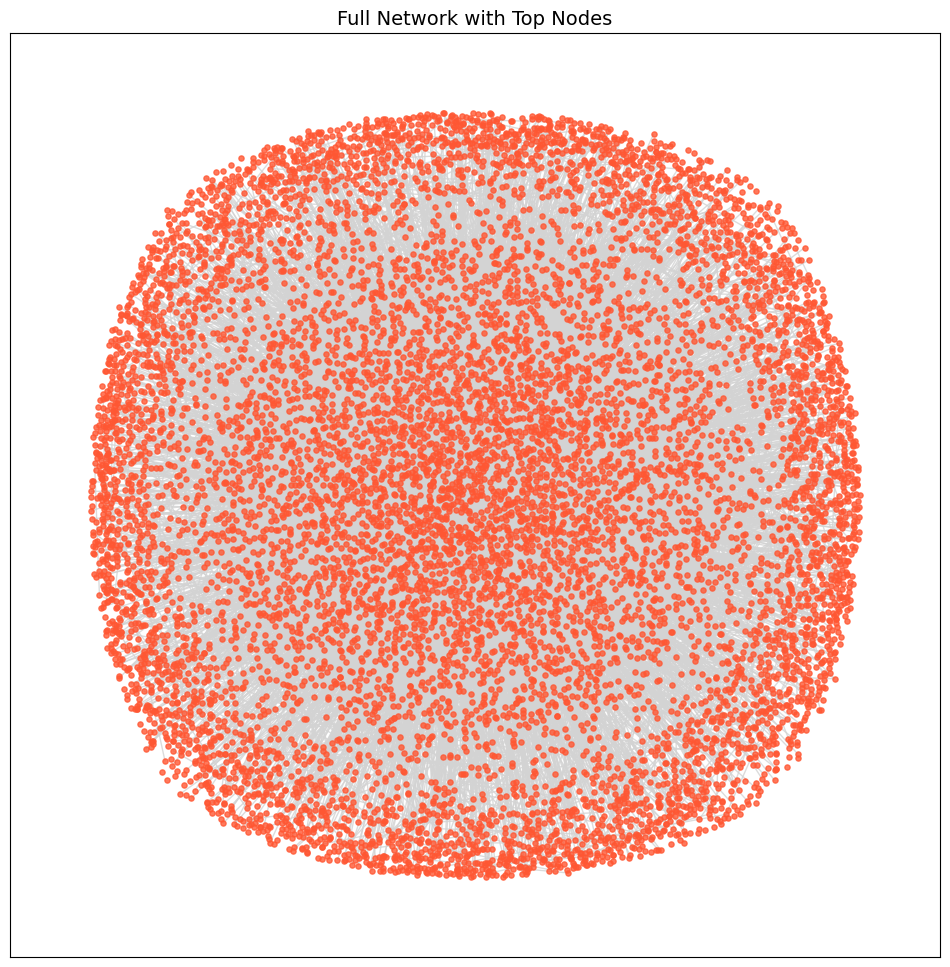

In [20]:

# Visualization function
def plot_graph(G, highlight_nodes, title):
    plt.figure(figsize=(12, 12))
    sampled_nodes = random.sample(list(G.nodes), min(10000, len(G.nodes)))
    subG = G.subgraph(sampled_nodes)
    pos = nx.spring_layout(subG, seed=42, k=0.1, iterations=30)
    
    nx.draw_networkx_edges(subG, pos, alpha=0.8, width=1, edge_color="lightgray")
    nx.draw_networkx_nodes(subG, pos, node_size=14, alpha=0.8, node_color="#ff5733")
    nx.draw_networkx_nodes(subG, pos, nodelist=[n for n in highlight_nodes if n in subG], node_size=50, node_color="red")
    
    plt.title(title, fontsize=14)
    plt.show()

# Generate visualizations
plot_graph(G, top_katz, "Katz Centrality - Top Influential Nodes")
plot_graph(G, top_pagerank, "PageRank - Most Important Nodes")
plot_graph(G, set(top_katz + top_pagerank), "Full Network with Top Nodes")


In [4]:
# Visualization of the full network graph

plt.figure(figsize=(12, 12))

# Use spring layout for better visualization
pos = nx.spring_layout(G, seed=42)

# Draw nodes and edges
nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.5, edge_color="gray")
nx.draw_networkx_nodes(G, pos, node_size=10, alpha=0.7, color="blue")

# Highlight top Katz and PageRank nodes in red
highlight_nodes = set(top_katz["id"].tolist() + top_pagerank["id"].tolist())
nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_size=50, color="red")

plt.title("Full Network Graph with Highlighted Top Nodes", fontsize=14)
plt.show()


KeyboardInterrupt: 

<Figure size 1200x1200 with 0 Axes>

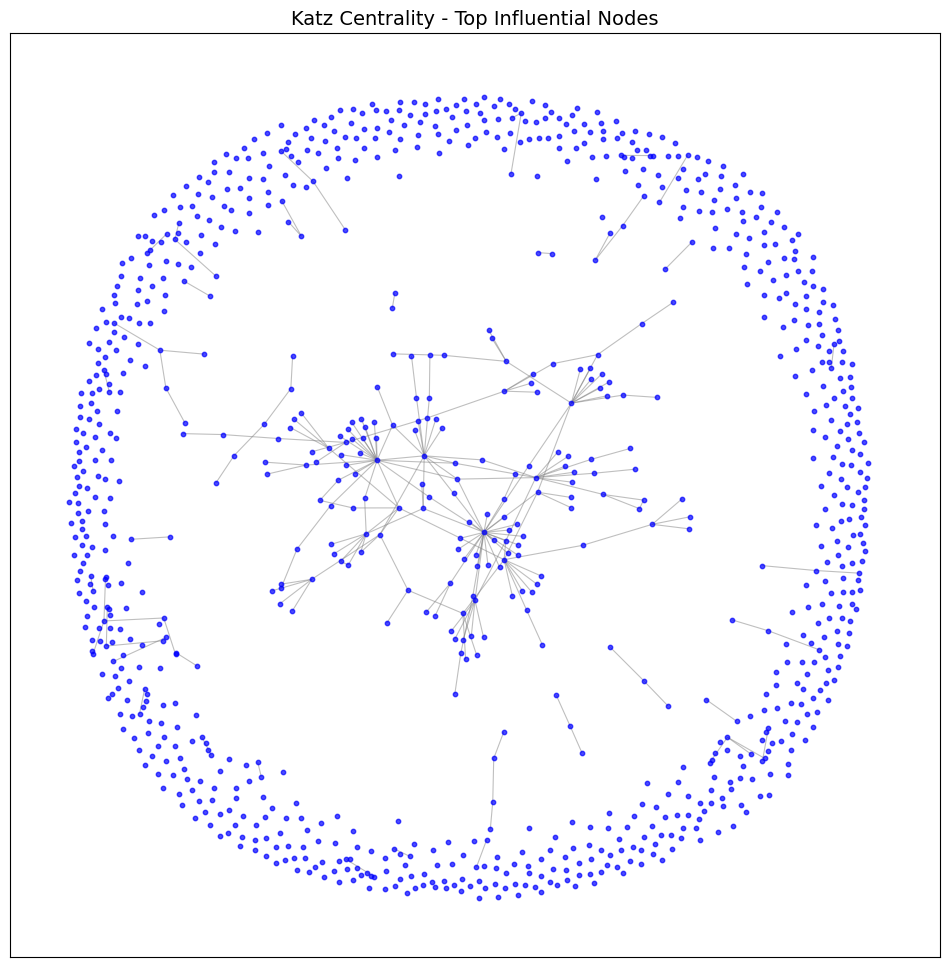

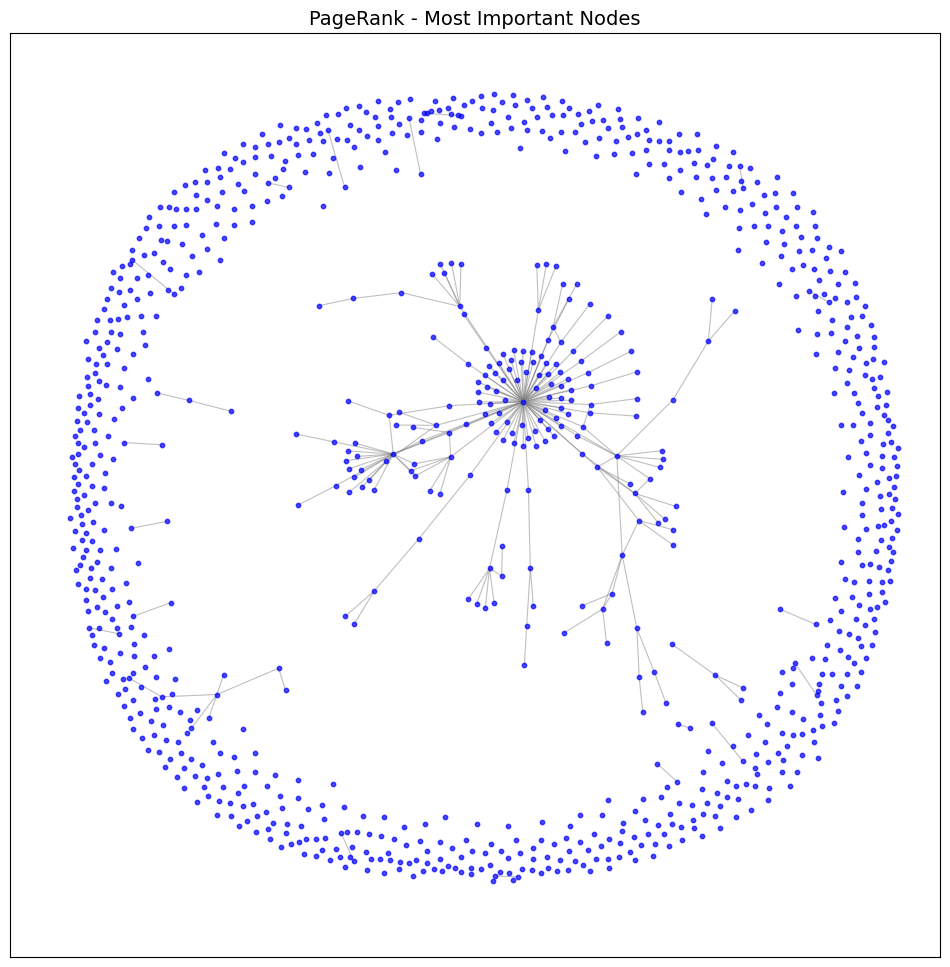

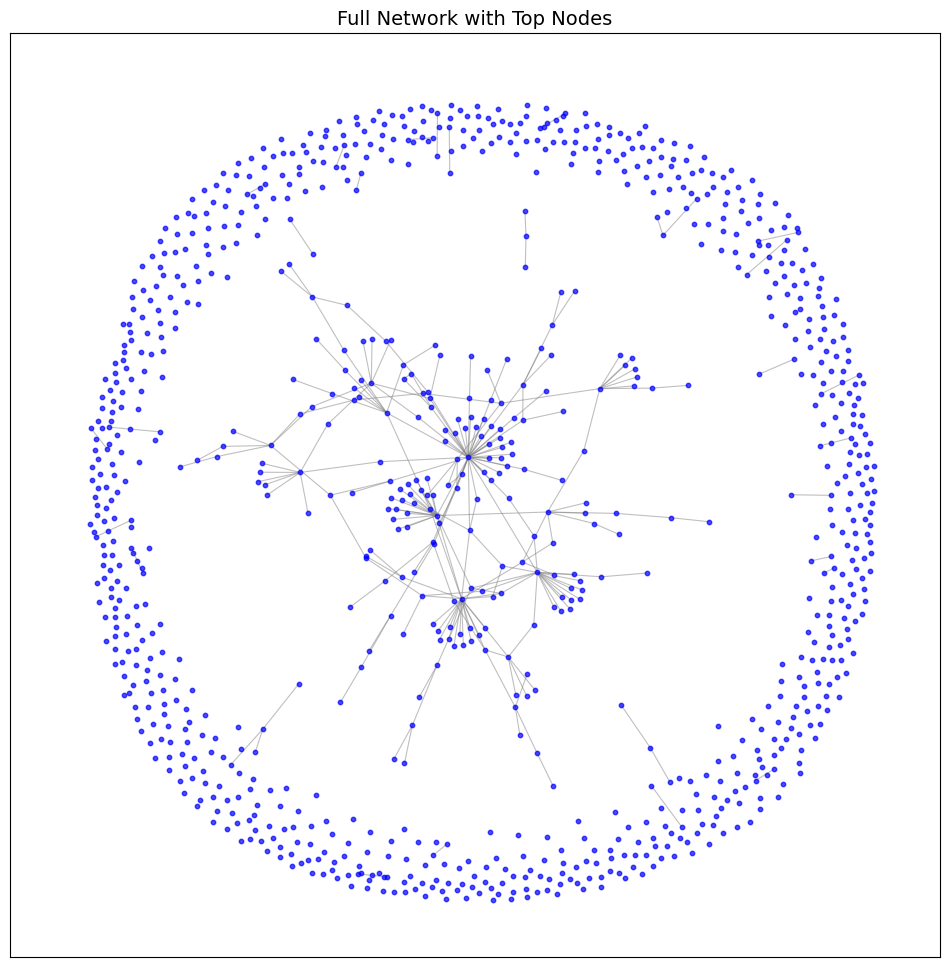

In [8]:
def plot_graph(G, highlight_nodes, title):
    plt.figure(figsize=(12, 12))
    sampled_nodes = random.sample(list(G.nodes), min(1000, len(G.nodes)))
    subG = G.subgraph(sampled_nodes)
    pos = nx.spring_layout(subG, seed=42, k=0.1, iterations=50)
    
    nx.draw_networkx_edges(subG, pos, alpha=0.5, width=0.8, edge_color="gray")
    nx.draw_networkx_nodes(subG, pos, node_size=10, alpha=0.7, node_color="blue")
    nx.draw_networkx_nodes(subG, pos, nodelist=[n for n in highlight_nodes if n in subG], node_size=50, node_color="red")
    
    plt.title(title, fontsize=14)
    plt.show()

# Generate visualizations
plot_graph(G, top_katz, "Katz Centrality - Top Influential Nodes")
plot_graph(G, top_pagerank, "PageRank - Most Important Nodes")
plot_graph(G, set(top_katz + top_pagerank), "Full Network with Top Nodes")

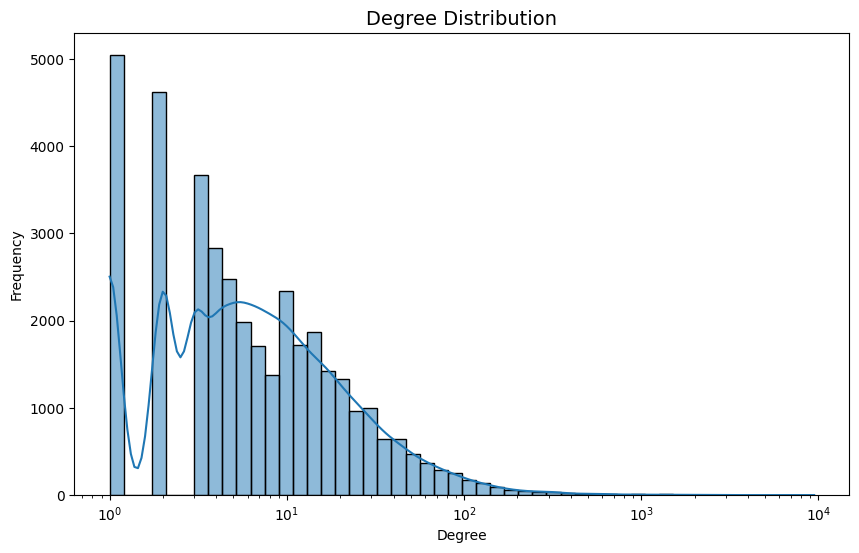

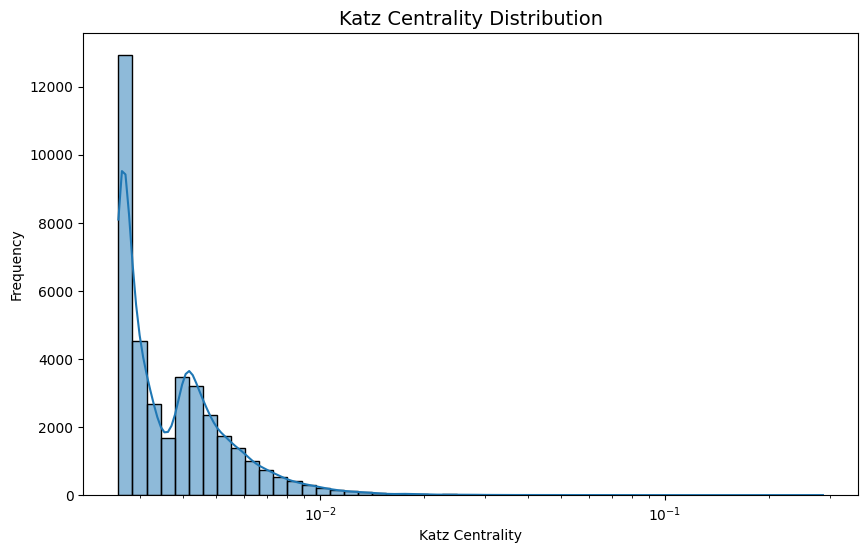

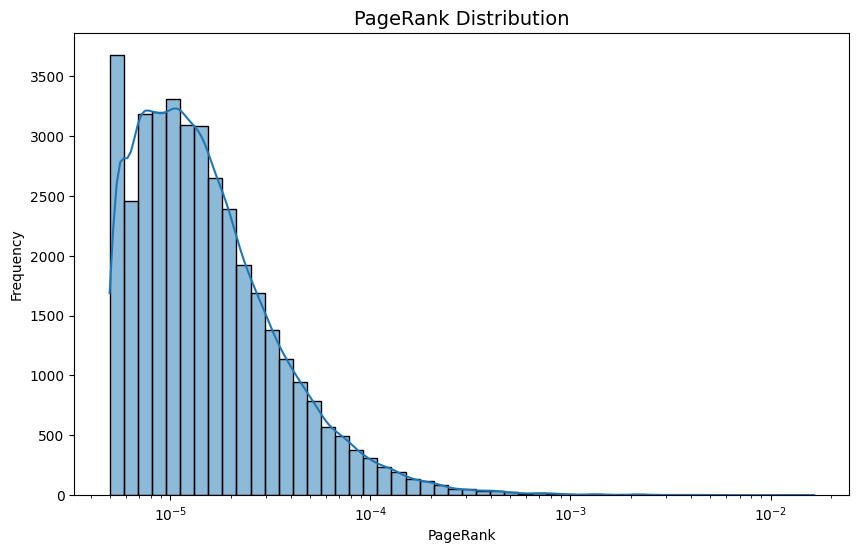

In [12]:

# Degree Distribution
def plot_distribution(values, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(values, bins=50, kde=True, log_scale=True)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.show()

# Compute degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plot_distribution(degrees, "Degree Distribution", "Degree")

# Compute Katz centrality distribution
plot_distribution(list(katz_centrality.values()), "Katz Centrality Distribution", "Katz Centrality")

# Compute PageRank distribution
plot_distribution(list(page_rank.values()), "PageRank Distribution", "PageRank")


In [ ]:

# Visualization function for full graph
def plot_graph(G, highlight_nodes, title):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42, k=0.1, iterations=50)
    
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.8, edge_color="gray")
    nx.draw_networkx_nodes(G, pos, node_size=10, alpha=0.7, node_color="blue")
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n in highlight_nodes if n in G], node_size=50, node_color="red")
    
    plt.title(title, fontsize=14)
    plt.show()

# Generate visualizations for full dataset
plot_graph(G, top_katz, "Katz Centrality - Full Network")
plot_graph(G, top_pagerank, "PageRank - Full Network")
plot_graph(G, set(top_katz + top_pagerank), "Full Network with Top Nodes")

# Degree Distribution
def plot_distribution(values, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(values, bins=50, kde=True, log_scale=True)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.show()

# Compute degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plot_distribution(degrees, "Degree Distribution (Full Network)", "Degree")


In [ ]:

# Compute Katz centrality distribution
plot_distribution(list(katz_centrality.values()), "Katz Centrality Distribution (Full Network)", "Katz Centrality")


In [ ]:

# Compute PageRank distribution
plot_distribution(list(page_rank.values()), "PageRank Distribution (Full Network)", "PageRank")
